In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [2]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [3]:
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [4]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [5]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [6]:
import torch.nn as nn

n_out = 2

model = nn.Sequential(
            nn.Linear(
                3072,  # <1>
                512,   # <2>
            ),
            nn.Tanh(),
            nn.Linear(
                512,   # <2>
                n_out, # <3>
            )
        )

In [7]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [8]:
x = torch.tensor([1.0, 2.0, 3.0])

softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [9]:
softmax(x).sum()

tensor(1.)

In [10]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [3.0, 2.0, 1.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.6652, 0.2447, 0.0900]])

In [11]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


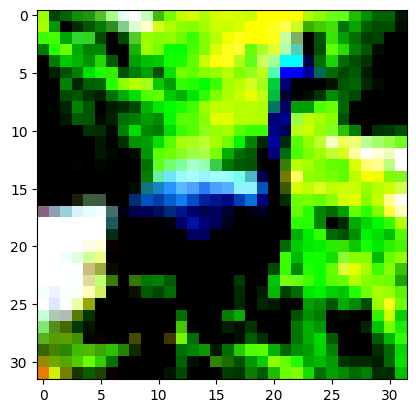

In [12]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [13]:
img_batch = img.view(-1).unsqueeze(0)

In [14]:
out = model(img_batch)
out

tensor([[0.4784, 0.5216]], grad_fn=<SoftmaxBackward0>)

In [15]:
_, index = torch.max(out, dim=1)

index

tensor([1])

In [16]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

In [17]:
loss = nn.NLLLoss()

In [18]:
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.5077, grad_fn=<NllLossBackward0>)

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 5

for epoch in range(n_epochs):
    for img, label in cifar2:
        img_tensor = img.view(-1).unsqueeze(0)
        label_tensor = torch.tensor([label])
        out = model(img_tensor)
        loss = loss_fn(out, label_tensor)
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 7.933513
Epoch: 1, Loss: 4.865759
Epoch: 2, Loss: 3.412104
Epoch: 3, Loss: 9.836231
Epoch: 4, Loss: 10.781808


In [20]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

In [21]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        img_tensor = imgs.view(batch_size, -1)
        label_tensor = torch.tensor(labels)
        out = model(img_tensor)
        loss = loss_fn(out, label_tensor)
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

C:\Users\howardhuang\AppData\Local\Temp\ipykernel_49148\9364895.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(labels)


Epoch: 0, Loss: 0.318367
Epoch: 1, Loss: 0.389473
Epoch: 2, Loss: 0.427979
Epoch: 3, Loss: 0.435714
Epoch: 4, Loss: 0.504344
Epoch: 5, Loss: 0.483689
Epoch: 6, Loss: 0.308372
Epoch: 7, Loss: 0.115488
Epoch: 8, Loss: 0.513510
Epoch: 9, Loss: 0.386493
Epoch: 10, Loss: 0.274975
Epoch: 11, Loss: 0.252231
Epoch: 12, Loss: 0.213218
Epoch: 13, Loss: 0.256708
Epoch: 14, Loss: 0.316772
Epoch: 15, Loss: 0.631465
Epoch: 16, Loss: 0.423487
Epoch: 17, Loss: 0.402729
Epoch: 18, Loss: 0.307367
Epoch: 19, Loss: 0.179422
Epoch: 20, Loss: 0.379566
Epoch: 21, Loss: 0.290748
Epoch: 22, Loss: 0.270363
Epoch: 23, Loss: 0.186533
Epoch: 24, Loss: 0.285739
Epoch: 25, Loss: 0.455766
Epoch: 26, Loss: 0.263250
Epoch: 27, Loss: 0.257489
Epoch: 28, Loss: 0.253201
Epoch: 29, Loss: 0.088151
Epoch: 30, Loss: 0.119370
Epoch: 31, Loss: 0.101625
Epoch: 32, Loss: 0.247492
Epoch: 33, Loss: 0.090906
Epoch: 34, Loss: 0.172537
Epoch: 35, Loss: 0.462267
Epoch: 36, Loss: 0.273000
Epoch: 37, Loss: 0.254223
Epoch: 38, Loss: 0.348

In [22]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.810500


In [23]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

In [24]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

loss_fn = nn.CrossEntropyLoss()

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        img_tensor = imgs.view(batch_size, -1)
        label_tensor = torch.tensor(labels)
        out = model(img_tensor)
        loss = loss_fn(out, label_tensor)
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

C:\Users\howardhuang\AppData\Local\Temp\ipykernel_49148\3226406213.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(labels)


Epoch: 0, Loss: 0.571264
Epoch: 1, Loss: 0.313634
Epoch: 2, Loss: 0.317605
Epoch: 3, Loss: 0.339209
Epoch: 4, Loss: 0.396129
Epoch: 5, Loss: 0.502080
Epoch: 6, Loss: 0.272827
Epoch: 7, Loss: 0.275626
Epoch: 8, Loss: 0.294260
Epoch: 9, Loss: 0.277196
Epoch: 10, Loss: 0.588599
Epoch: 11, Loss: 0.679920
Epoch: 12, Loss: 0.694684
Epoch: 13, Loss: 0.216509
Epoch: 14, Loss: 0.257251
Epoch: 15, Loss: 0.367354
Epoch: 16, Loss: 0.215198
Epoch: 17, Loss: 0.159641
Epoch: 18, Loss: 0.293755
Epoch: 19, Loss: 0.328064
Epoch: 20, Loss: 0.375317
Epoch: 21, Loss: 0.381251
Epoch: 22, Loss: 0.421697
Epoch: 23, Loss: 0.186160
Epoch: 24, Loss: 0.388323
Epoch: 25, Loss: 0.295580
Epoch: 26, Loss: 0.168410
Epoch: 27, Loss: 0.273761
Epoch: 28, Loss: 0.075763
Epoch: 29, Loss: 0.226366
Epoch: 30, Loss: 0.097388
Epoch: 31, Loss: 0.134953
Epoch: 32, Loss: 0.083903
Epoch: 33, Loss: 0.213210
Epoch: 34, Loss: 0.077667
Epoch: 35, Loss: 0.294085
Epoch: 36, Loss: 0.466938
Epoch: 37, Loss: 0.069569
Epoch: 38, Loss: 0.337

In [26]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000


In [27]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.805500


In [28]:
numel_list = [p.numel()
              for p in model.parameters()
              if p.requires_grad == True]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [29]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))

numel_list = [p.numel() for p in first_model.parameters()]
sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

In [30]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))